# Vectors and Matrices

In [1]:
import numpy as np

## Vectors

Suppose there are three-point charges, Q1 = +2 $μ$C, Q2 = -4 $μ$C, and Q3 = +6 $μ$C, are positioned at (1, 0), (0, 2), and (-2, -1) meters, respectively. The
electric field at the point $\vec{x}$ due to a point charge $q_1$ at the point $\vec{x_1}$ is given by,
$$
\vec{E}=\frac{q_1}{4πϵ_0}\frac{\vec{x} - \vec{x_1}}{\left| \vec{x} - \vec{x_1} \right|^3}
$$
Here, $ϵ_0=8.854×10^{-12}\ Fm^{-1}$.  
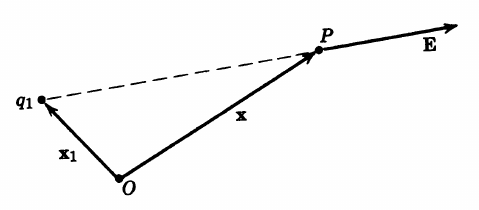

In [2]:
# Here I used object oriented approch to solve this problem.
# I treated the point charge as a object which has two properties elctric charge and position.
# With this approch electric field at any point in space can be calculated (Except the points that charges are located).

class PointCharge:
  def __init__(self, Q, r0):
    self.Q = Q
    self.r0 = r0
  def get_Efield(self, r):
    k = 1/(4*np.pi*8.854e-12)
    return k*self.Q*(r-self.r0)/np.linalg.norm(r-self.r0)**3

In [3]:
# defining point charges
Q1 = PointCharge(2e-6, np.array([1, 0, 0]))
Q2 = PointCharge(-4e-6, np.array([0, 2, 0]))
Q3 = PointCharge(6e-6, np.array([-2, -1, 0]))

Let's First find the electric field by each charges at the origin.

In [4]:
origin = np.array([0, 0, 0])
print(f"E field by Q1 at origin = {Q1.get_Efield(origin)}")
print(f"E field by Q2 at origin = {Q2.get_Efield(origin)}")
print(f"E field by Q3 at origin = {Q3.get_Efield(origin)}")

E field by Q1 at origin = [-17975.48487598      0.              0.        ]
E field by Q2 at origin = [  -0.         8987.74243799   -0.        ]
E field by Q3 at origin = [9646.65746669 4823.32873334    0.        ]


Now let's find total elctric field at the origin.
$$
\vec{E_{total}} = \vec{E_1} + \vec{E_2} + \vec{E_3}
$$

In [5]:
total_field = Q1.get_Efield(origin) + Q2.get_Efield(origin) + Q3.get_Efield(origin)
print(f"Total E field at origin = {total_field}")
print(f"Magnitude of total field = {np.linalg.norm(total_field)}")
print(f"Angel to positive direction of x = {np.rad2deg(np.arctan2(total_field[1], total_field[0]))} degrees")
print(f"Unit vector = {total_field / np.linalg.norm(total_field)}")

Total E field at origin = [-8328.82740929 13811.07117133     0.        ]
Magnitude of total field = 16128.082741396027
Angel to positive direction of x = 121.09226324983518 degrees
Unit vector = [-0.5164177   0.85633683  0.        ]


Now let's find electric field at a given point in 3D space.

In [6]:
x = np.array([2, -4, 3])
total_field = Q1.get_Efield(x) + Q2.get_Efield(x) + Q3.get_Efield(x)
print(f"Total E field at x = {total_field}")
print(f"Magnitude of total field = {np.linalg.norm(total_field)}")

Total E field at x = [1013.9976968  -729.49864722  908.35082278]
Magnitude of total field = 1544.4937107879323


## Matrices

Different types of matrix operations and matrix manipulations are defined in the **Numpy** package. Check out Documentation for more details.

## System of Linear Equations (SLE)

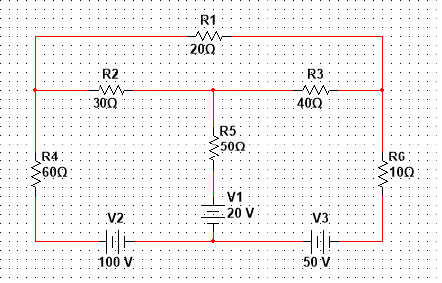

Let's find the current through each resistor.
\begin{align*}
I_1 = \text{Current through 60 Ω resistor}\\
I_2 = \text{Current through 20 Ω resistor}\\
I_3 = \text{Current through 30 Ω resistor}\\
I_4 = \text{Current through 50 Ω resistor}\\
I_5 = \text{Current through 40 Ω resistor}\\
I_6 = \text{Current through 10 Ω resistor}
\end{align*}

By Kirchhoff's Current law,
\begin{align*}
I_1 - I_2 - I_3 &= 0 \\
I_3 + I_4 - I_5 &= 0 \\
-I_1 - I_4 + I_6 &= 0 \\
I_2 + I_5 - I_6 &= 0 \\
\end{align*}

By Kirchhoff's Voltage law,
\begin{align*}
60I_1 + 30I_3 - 50I_4 &= 80 \\
50I_4 + 40I_5 + 10I_6 &= 70 \\
\end{align*}


In matrix equation format,
\begin{align*}
\begin{pmatrix}
1 & -1 & -1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & -1 & 0 \\
-1 & 0 & 0 & -1 & 0 & 1 \\
0 & 1 & 0 & 0 & 1 & -1 \\
60 & 0 & 30 & -50 & 0 & 0 \\
0 & 0 & 0 & 50 & 40 & 10 \\
\end{pmatrix}
\begin{pmatrix}
I_1 \\
I_2 \\
I_3 \\
I_4 \\
I_5 \\
I_6 \\
\end{pmatrix}
&=
\begin{pmatrix}
0 \\
0 \\
0 \\
0 \\
80 \\
70 \\
\end{pmatrix}\\
A x &= b
\end{align*}

In [7]:
A = np.array([
    [1, -1, -1, 0, 0, 0],
    [0, 0, 1, 1, -1, 0],
    [-1, 0, 0, -1, 0, 1],
    [0, 1, 0, 0, 1, -1],
    [60, 0, 30, -50, 0, 0],
    [0, 0, 0, 50, 40, 10]
])

b = np.array([0, 0, 0, 0, 80, 70])

# Solve the system of equations
x = np.linalg.solve(A, b)

print(f"Solution vector x = {x}")


Solution vector x = [1.56338028 1.29577465 0.26760563 0.43661972 0.70422535 2.        ]
